# Model Evaluation

## Review of last class

- Goal was to predict the **response value** of an **unknown observation**
    - predict the species of an unknown iris
    - predict the position of an unknown NBA player
- Made predictions using KNN models with **different values of K**
- Need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**Solution:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

**Note:** These procedures can be used with **any machine learning model**, not only KNN.

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [1]:
# read the NBA data into a DataFrame
from IPython.display import Image
%matplotlib inline 

import pandas as pd
url = 'https://raw.githubusercontent.com/JamesByers/GA-SEA-DAT2/master/data/NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [2]:
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [4]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pos_num
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3,1
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0,2
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6,0
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0,1
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2,2


In [7]:
# create feature matrix (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]
X

,ast,stl,blk,tov,pf
0,1.0,0.4,0.3,0.9,2.2
1,0.4,0.4,0.3,0.4,0.8
2,1.0,0.4,1.2,1.6,3.0
3,0.9,0.2,0.5,0.5,1.8
4,1.9,0.6,0.1,1.6,2.1
5,0.6,0.3,0.7,1.0,2.3
6,0.6,0.4,0.4,0.4,1.8
7,1.0,0.6,0.9,1.0,2.1
8,1.8,0.7,1.0,1.8,1.9
9,1.3,0.3,0.8,0.7,1.8


In [8]:
# create response vector (y)
y = nba['pos_num']

### KNN (K=50)

In [15]:
# import the class

from sklearn.neighbors import KNeighborsClassifier

# instantiate the model

knn = KNeighborsClassifier(n_neighbors=50)

# train the model on the entire dataset

knn.fit(X,y)

# predict the response values for the observations in X ("test the model")

knn.predict(X)


array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,

In [16]:
# store the predicted response values
y_pred_class = knn.predict(X)

To evaluate a model, we also need an **evaluation metric:**

- Numeric calculation used to **quantify** the performance of a model
- Appropriate metric depends on the **goals** of your problem

Most common choices for classification problems:

- **Classification accuracy**: percentage of correct predictions ("reward function" since higher is better)
- **Classification error**: percentage of incorrect predictions ("loss function" since lower is better)

In this case, we'll use classification accuracy.

In [17]:
y.value_counts()

2    200
1    199
0     79
Name: pos_num, dtype: int64

In [18]:
# compute classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred_class))

0.6652719665271967


This is known as **training accuracy** because we are evaluating the model on the same data we used to train the model.

### KNN (K=1)

In [24]:
#Build the same model with K = 1
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(X,y)

y_pred_class = knn.predict(X)


metrics.accuracy_score(y,y_pred_class)

1.0

### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data:
    - Will do well when tested using the in-sample data
    - May do poorly on out-of-sample data
    - Learns the "noise" in the data rather than the "signal"
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

**Thus, training accuracy is not a good estimate of out-of-sample accuracy.**

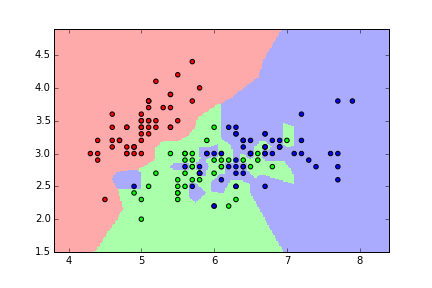

In [62]:
Image("../../assets/images/iris_01nn_map.png")

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

What does this accomplish?

- Model can be trained and tested on **different data** (we treat testing data like out-of-sample data).
- Response values are known for the testing set, and thus **predictions can be evaluated**.

This is known as **testing accuracy** because we are evaluating the model on an independent "test set" that was not used during model training.

**Testing accuracy is a better estimate of out-of-sample performance than training accuracy.**

### Understanding "unpacking"

In [25]:
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    return [smallest, largest]

In [44]:
min_and_max = min_max([1, 2, 3])
print(min_and_max)
print(type(min_and_max))

[1, 3]
<class 'list'>


In [ ]:
## I can return 2 values and assign them to 2 names
## it's called tuple unpacking

In [45]:
the_min, the_max = min_max([1, 2, 3])
print(the_min)
print(type(the_min))
print(the_max)
print(type(the_max))

1
<class 'int'>
3
<class 'int'>


### Understanding the `train_test_split` function

In [26]:
#Add train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# before splitting
print(X.shape)

# after splitting
print(X_train.shape)
print(X_test.shape)

(478, 5)
(358, 5)
(120, 5)


In [26]:
# before splitting
print(y.shape)

# after splitting
print(y_train.shape)
print(y_test.shape)

(478,)
(358,)
(120,)


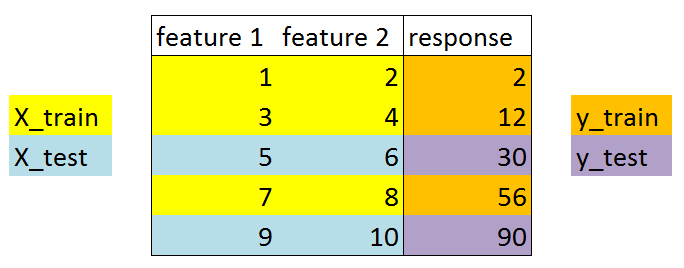

In [27]:
Image("../../assets/images/train_test_split.png")

In [61]:
# create a function with the same functionality as train test split
# 1. name the function tt_split
def tt_split(X,y,percent=.75):
    ind = int(len(x)*percent)
    X_train = X[:ind]
    X_test = X[ind:]
    y_train = y[:ind]
    y_test = y
    return [train, test]


# 2. the function should split both X and y into a train and test set and return both
# 3. BONUS: allow the user to say what % of data should lie in the training set



### Understanding the `random_state` parameter

In [63]:
# WITHOUT a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y)

# print the first element of each object
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

     ast  stl  blk  tov   pf
456  0.1  0.5  2.4  1.1  2.6
     ast  stl  blk  tov   pf
153  1.1  0.7  0.3  0.9  1.3
456    0
Name: pos_num, dtype: int64
153    1
Name: pos_num, dtype: int64


In [64]:
# WITH a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# print the first element of each object
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

     ast  stl  blk  tov   pf
234  1.4  0.9  1.1  1.1  2.2
     ast  stl  blk  tov   pf
469  1.0  0.4  0.1  0.6  0.9
234    1
Name: pos_num, dtype: int64
469    2
Name: pos_num, dtype: int64


### Using the train/test split procedure (K=1)

In [29]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

##testing data is for evaluating the model
## training data is for feeding the model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.6583333333333333


### Repeating for K=50

In [69]:
#build the same model with k=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.67500000000000004

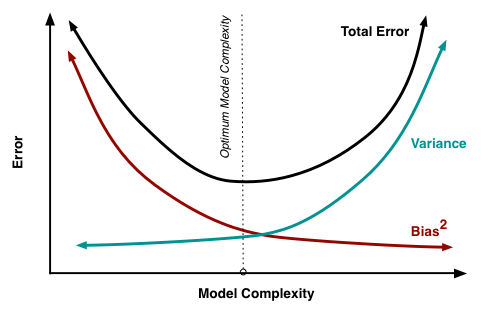

In [36]:
Image("../../assets/images/bias_variance.png")

### Comparing testing accuracy with null accuracy

Null accuracy is the accuracy that could be achieved by **always predicting the most frequent class**. It is a benchmark against which you may want to measure your classification model.

In [37]:
# examine the class distribution
y_test.value_counts()

2    60
1    49
0    11
Name: pos_num, dtype: int64

In [38]:
# compute null accuracy
y_test.value_counts().head(1) / len(y_test)

2    0.5
Name: pos_num, dtype: float64

### Searching for the "best" value of K

In [36]:
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 100

k_range = range(1, 101)
training_error = []
testing_error = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X, y)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [37]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [39]:
# create a DataFrame of K, training error, and testing error
column_dict = {'K': k_range
               , 'training error':training_error
               , 'testing error':testing_error}
df = pd.DataFrame(column_dict) #.set_index('K').sort_index(ascending=False)
df.head()

,K,testing error,training error
0,1,0.341667,0.000000
1,2,0.300000,0.184100
2,3,0.350000,0.190377
3,4,0.333333,0.221757
4,5,0.350000,0.251046


Text(0,0.5,'Error (lower is better)')

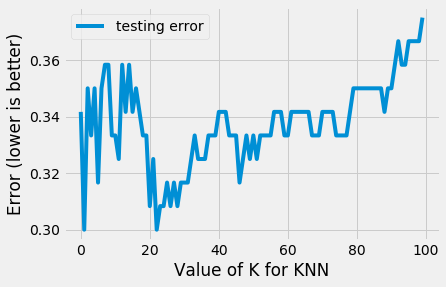

In [40]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
df.plot.line(y='testing error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

Text(0,0.5,'Error (lower is better)')

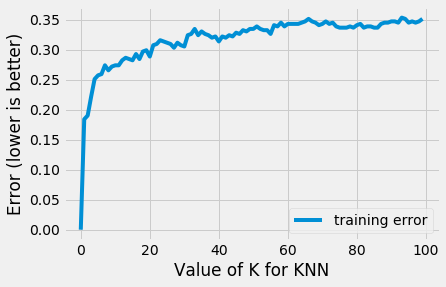

In [41]:
# plot the relationship between K (HIGH TO LOW) and TRAINING ERROR
df.plot(y='training error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

In [77]:
# find the minimum testing error and the associated K value
df.sort_values('testing error').head()

,testing error,training error
K,,
2,0.300000,0.184100
23,0.300000,0.309623
29,0.308333,0.311715
27,0.308333,0.309623
21,0.308333,0.288703


In [78]:
# alternative method
min(zip(testing_error, k_range))

(0.30000000000000004, 2)

What could we conclude?

- When using KNN on this dataset with these features, the **best value for K** is likely to be around 23.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 70% of the time.

### Training error versus testing error

Text(0,0.5,'Error (lower is better)')

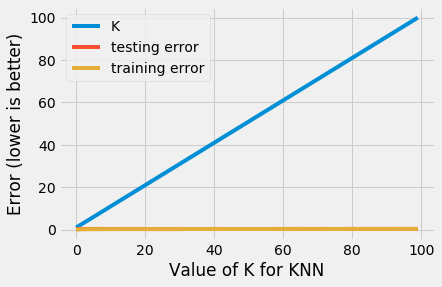

In [42]:
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

![Bias-variance tradeoff](../../assets/images/training_testing_error.png)

## Making predictions on out-of-sample data

Given the statistics of a (truly) unknown player, how do we predict his position?

In [81]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=23)

# re-train the model with X and y (not X_train and y_train) - why?
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[1, 1, 0, 1, 2]])

array([1], dtype=int64)

## Disadvantages of train/test split?

What would happen if the `train_test_split` function had split the data differently? Would we get the same exact results as before?

In [44]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=98)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.6416666666666667


- Testing accuracy is a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its **flexibility and speed**

**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

In [45]:
Diagram of **5-fold cross-validation:**

Image("../../assets/images/cross_validation_diagram.png")

SyntaxError: invalid syntax (<ipython-input-45-f9326271cd41>, line 1)

In [74]:
# simulate splitting a dataset of 25 observations into 5 folds
import numpy as np
X_ = np.array([num for num in range(0,25)])

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)

# print the contents of each training and testing set
for train_index, test_index in kf.split(X_):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    print()

TRAIN: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
TEST: [0 1 2 3 4]

TRAIN: [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
TEST: [5 6 7 8 9]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]
TEST: [10 11 12 13 14]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]
TEST: [15 16 17 18 19]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
TEST: [20 21 22 23 24]



- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print('The cross_val scores are: {}'.format(scores), '\n')
print('The mean of the cross_val scores is: {}'.format(scores.mean()))

The cross_val scores are: [ 0.58333333  0.72916667  0.6875      0.58333333  0.64583333  0.6875
  0.64583333  0.625       0.70833333  0.69565217] 

The mean of the cross_val scores is: 0.6591485507246377


**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

## Resources

- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)